# Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
#Machine Learning
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression #Most efficient if y variable can be classified into only two types of classes
from sklearn import svm #Good alternative to Logistic Regression
from sklearn.metrics import accuracy_score
from sklearn import metrics
from sklearn.metrics import confusion_matrix #For indetifying positives and negatives
#Neural NET
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential #For layer by layer algorithm
from keras.layers import Dense 

import warnings
warnings.filterwarnings('ignore')

# Data Gathering

In [2]:
titanic_train=pd.read_csv('train.csv')# Data scraped from https://www.kaggle.com/c/titanic
titanic_test=pd.read_csv('test.csv')

In [3]:
titanic_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
#Checking number and type of data
titanic_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [5]:
#Identifying no. of NaN
titanic_train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [6]:
#Identifying no. of unique values
titanic_train.nunique()

PassengerId    891
Survived         2
Pclass           3
Name           891
Sex              2
Age             88
SibSp            7
Parch            7
Ticket         681
Fare           248
Cabin          147
Embarked         3
dtype: int64

In [7]:
#Presenting statistical data
titanic_train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


# Preparing Data

In [8]:
#Managing NaN values
titanic_train['Age'].fillna(titanic_train['Age'].mean(),inplace=True) #Setting Age Nan values to average or most common Age value

In [9]:
#Removing Cabin as a feature as it contains 147 unique values and 687 null values
titanic_train=titanic_train.drop(columns='Cabin',axis=1)

In [10]:
#Setting Embarked Nan values to most occuring value
titanic_train['Embarked'].fillna(titanic_train['Embarked'].mode()[0],inplace=True)

In [11]:
#All Nan values managed
titanic_train.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [12]:
#Transforming selected feature float values to integer values
titanic_train['Sex'].unique()

array(['male', 'female'], dtype=object)

In [13]:
titanic_train['Embarked'].unique()

array(['S', 'C', 'Q'], dtype=object)

In [14]:
Sex = {
    'male': 1,
    'female': 0
}
Embarked = {
    'S': 0,
    'C': 1,
    'Q': 2
}

In [15]:
titanic_train['Sex'].replace(Sex, inplace=True)
titanic_train['Embarked'].replace(Embarked, inplace=True)
titanic_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,1
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,0
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,0


<AxesSubplot:xlabel='Survived', ylabel='count'>

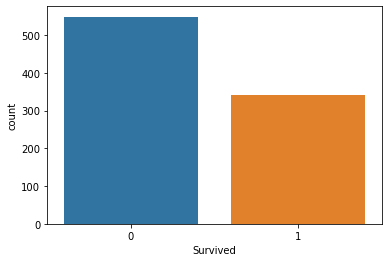

In [16]:
#Plot data of number of survived or not
sns.countplot('Survived', data=titanic_train)

In [17]:
#Rate of survival by Sex
titanic_train[["Sex", "Survived"]].groupby(['Sex'], as_index=False).mean().sort_values(by='Survived', ascending=False)
#18.8 percent of all perished are male

,Sex,Survived
0,0,0.742038
1,1,0.188908


In [18]:
#Rate of survival by Age
titanic_train[["Age", "Survived"]].groupby(['Age'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Age,Survived
0,0.42,1.0
9,5.00,1.0
80,63.00,1.0
69,53.00,1.0
1,0.67,1.0
...,...,...
50,36.50,0.0
32,24.50,0.0
47,34.50,0.0
41,30.50,0.0


In [19]:
#Rate of survival by Class
titanic_train[["Pclass", "Survived"]].groupby(['Pclass'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


In [20]:
#Data feature and prediction selection
titanic_train.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Embarked'],
      dtype='object')

In [21]:
X = titanic_train.drop(columns= ['PassengerId','Survived','Name','Ticket','Fare']) #Drop unwanted feature
y = titanic_train['Survived']

In [22]:
print(X)

     Pclass  Sex        Age  SibSp  Parch  Embarked
0         3    1  22.000000      1      0         0
1         1    0  38.000000      1      0         1
2         3    0  26.000000      0      0         0
3         1    0  35.000000      1      0         0
4         3    1  35.000000      0      0         0
..      ...  ...        ...    ...    ...       ...
886       2    1  27.000000      0      0         0
887       1    0  19.000000      0      0         0
888       3    0  29.699118      1      2         0
889       1    1  26.000000      0      0         1
890       3    1  32.000000      0      0         2

[891 rows x 6 columns]


In [23]:
print(y)

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64


In [24]:
#Splitting data into training and testing
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state=0)

# Choosing a Model

# Model 1 - Logistic Regression

In [25]:
model_1 = LogisticRegression() #Model selection

In [26]:
model_1.fit(X_train, y_train) #Fitting data to model

LogisticRegression()

In [27]:
model_1_test_prediction = model_1.predict(X_test) #Testing Logistic prediction

In [28]:
print(model_1_test_prediction)

[0 0 0 1 1 1 1 1 1 1 0 1 0 1 1 1 0 0 0 0 0 1 0 1 1 1 0 1 1 1 0 1 0 1 0 1 0
 0 0 0 0 0 0 0 1 0 0 1 0 0 1 1 1 0 1 0 0 0 0 0 0 1 1 1 1 0 1 0 1 1 1 0 0 0
 0 1 0 0 0 0 0 0 1 0 0 1 1 0 1 1 1 0 0 1 1 0 1 0 0 1 0 0 0 0 1 0 1 0 0 1 0
 1 0 1 0 1 1 1 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 1 0 1 1 1 0 1
 1 0 0 1 1 0 1 0 0 0 1 1 0 0 1 0 0 0 0 0 0 0 0 1 0 0 1 0 1 0 0]


In [29]:
model_1_testing_accuracy = accuracy_score(y_test, model_1_test_prediction) 
print('Accuracy: ',model_1_testing_accuracy )

Accuracy:  0.8156424581005587


In [30]:
confusion_matrix(y_test,model_1_test_prediction)

array([[92, 18],
       [15, 54]], dtype=int64)

# Model 2 - SVM

In [31]:
model_2 = svm.SVC(kernel='linear') #Model Selection

In [32]:
model_2.fit(X_train , y_train) #Fitting data to model

SVC(kernel='linear')

In [33]:
model_2_test_prediction = model_2.predict(X_test) # SVM test prediction

In [34]:
print(model_2_test_prediction)

[0 0 0 1 1 0 1 1 0 1 0 1 0 1 1 1 0 0 0 0 0 1 0 0 1 1 0 1 1 1 0 1 0 0 0 0 0
 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 1 0 0 0 0 1 0 0 0 1 1 0 1 0 1 0 1 1 1 0 0 0
 0 1 0 0 0 0 0 0 1 0 0 1 1 1 1 0 0 0 0 1 1 0 1 0 0 0 0 0 0 0 1 1 1 1 0 1 0
 1 0 1 0 1 1 1 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 1 0 0 0 1 0 1 1 1 0 1
 1 0 0 1 1 0 1 0 1 0 1 1 0 0 1 1 0 0 0 0 0 0 0 1 0 0 1 0 1 0 0]


In [35]:
print("Accuracy:",metrics.accuracy_score(y_test,model_2_test_prediction))

Accuracy: 0.7877094972067039


In [36]:
confusion_matrix(y_test,model_2_test_prediction)

array([[92, 18],
       [20, 49]], dtype=int64)

In [37]:
print(X_train.shape, y_train.shape) #values distributed to train and test
print(X_test.shape, y_test.shape)

(712, 6) (712,)
(179, 6) (179,)


# Model 3 - Simple Neural Network (Sequential)

In [38]:
#Neural Network model selection
model = Sequential()# model for layer c layer neural network design
model.add(Dense(12, input_shape=(6,), activation='relu')) #Shape is 6 because we have 6 features
model.add(Dense(8, activation='relu')) #To avoid vanishin/exploding gradient problem
model.add(Dense(1, activation='sigmoid')) #Output is binary for 1 and 0

In [39]:
# compiling the model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])#Needed output metric is accuracy
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 12)                84        
                                                                 
 dense_1 (Dense)             (None, 8)                 104       
                                                                 
 dense_2 (Dense)             (None, 1)                 9         
                                                                 
Total params: 197
Trainable params: 197
Non-trainable params: 0
_________________________________________________________________


In [40]:
#Fitting the Model
model.fit(X, y, epochs=300, batch_size=5)

Epoch 1/300
179/179 [==============================] - 1s 1ms/step - loss: 0.7074 - accuracy: 0.5780
Epoch 2/300
179/179 [==============================] - 0s 1ms/step - loss: 0.5922 - accuracy: 0.6644
Epoch 3/300
179/179 [==============================] - 0s 1ms/step - loss: 0.5629 - accuracy: 0.7059
Epoch 4/300
179/179 [==============================] - 0s 1ms/step - loss: 0.5365 - accuracy: 0.7565
Epoch 5/300
179/179 [==============================] - 0s 2ms/step - loss: 0.5210 - accuracy: 0.7553
Epoch 6/300
179/179 [==============================] - 0s 2ms/step - loss: 0.5166 - accuracy: 0.7710
Epoch 7/300
179/179 [==============================] - 0s 1ms/step - loss: 0.5065 - accuracy: 0.7800
Epoch 8/300
179/179 [==============================] - 0s 1ms/step - loss: 0.4939 - accuracy: 0.7935
Epoch 9/300
179/179 [==============================] - 0s 2ms/step - loss: 0.4838 - accuracy: 0.8025
Epoch 10/300
179/179 [==============================] - 0s 1ms/step - loss: 0.4721 - accura

In [43]:
loss, accuracy = model.evaluate(X_test, y_test, verbose=False)
print("Accuracy {:.4f}".format(accuracy))
loss, accuracy = model.evaluate(X_test, y_test, verbose=False)
print("Loss {:.4f}".format(loss))

Accuracy 0.8212
Loss 0.3524


# Comparison

In [45]:
print('Accuracy of Logistic Regression: ',model_1_testing_accuracy )
print("Accuracy of Support Vector Machine:",metrics.accuracy_score(y_test,model_2_test_prediction))
print("Accuracy of Nueral Network Sequential: {:.4f}".format(accuracy))

Accuracy of Logistic Regression:  0.8156424581005587
Accuracy of Support Vector Machine: 0.7877094972067039
Accuracy of Nueral Network Sequential: 0.8212


Based on testing accuracy, The Sequential Neural network has performed better than both machine learning algorithm but Logistic Regression algorithm is not lagging behind in  performance

# Analysis

Neural Networks perfrom considerably well for it structures its algorithm where it can learn and decide wisely on its own through well structured layers, connecting each weights and biases to the output. While Machine learning can only makes its decisions or predictions based on what its learned, learning by either supervised or unsuperviesd. The superiority of neaural network as an algorithm has been shown on this program ranking highest in accuracy scores, for it makes use of  gradient descent, the neural network model gain knowledge over time by using training data, and the cost function in gradient descent especially serves as a barometer by assessing the accuracy of each iteration of parameter changes. With batch size and epoch. The sequential model with its dense layers with hyperparameters like batch sizr and epoch updates its model to better predict the outcome of input data. Logistic Regression not falling that far behind in the ranking of accuracy scores for it does extremely well if the output we want to identify falls between two classifications. It falls well for the dataset since its a supervised learning and most of its data are labeled. SVM ranked lowest from all the algorithms, I have researched that a dataset with multiple label with only two targets gives SVM a hard time in classification, based on the iris data set that I have seen has only two labels for the selected target values, for this dataset i have included 5 labes, the might be the reason for its low performance.

# Conclusion

If we are to create an algorithm for training and testing Neural network provides better structuring and performance, but it depends on the dataset, some machine learning algorithms perform well and on par with neural networks in classification. As seen from the data a simple Logistic Regression almost has the same accuracy as the built neaural network with strain on users device.